### A Feedforward Neural Network to implement the logical XNOR operation, utilizing the sigmoid (S-shaped) function as the activation function

100%|██████████| 8000/8000 [00:02<00:00, 3727.16it/s]



Input: tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

Raw Output (Probabilities): tensor([[0.8723],
        [0.1364],
        [0.0578],
        [0.8982]])

Predicted XNOR (Rounded): tensor([[1.],
        [0.],
        [0.],
        [1.]])


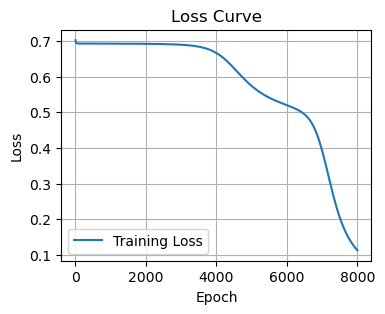

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt  # Import for plotting

# Set random seed
torch.manual_seed(1)

# Define the dataset for XNOR operation
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)  # True GT

# Define the neural network for XNOR
class XNORNet(nn.Module):
    def __init__(self):
        super(XNORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)  # Hidden layer with 2 neurons
        self.output = nn.Linear(2, 1)  # Output layer with 1 neuron
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))  # Apply sigmoid activation to hidden layer
        x = self.sigmoid(self.output(x))  # Apply sigmoid activation to output layer
        return x

# Initialize the model, loss function, and optimizer
model = XNORNet()
criterion = nn.BCELoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Set learning rate to 0.1

# Train the model
epochs = 8000
loss_values = []  # List to store loss values

for epoch in tqdm(range(epochs)):
    outputs = model(data)
    loss = criterion(outputs, labels)
    loss_values.append(loss.item())  # Store the loss value
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Testing the model
with torch.no_grad():
    outputs = model(data)
    binary_predictions = torch.round(outputs)  # Rounded predictions

# Print results
print("\nInput:", data)
print("\nRaw Output (Probabilities):", outputs)
print("\nPredicted XNOR (Rounded):", binary_predictions)

# Plot the loss curve
plt.figure(figsize=(4, 3))
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()
